In [11]:
import numpy as np
import matplotlib.pyplot as plt

def linear_diffusion_schedules(diffusion_times):
    min_rate=0.0001
    max_rate=0.02
    betas = min_rate + diffusion_times*(max_rate - min_rate)
    alphas = 1 - betas
    alpha_bars = np.cumprod(alphas)
    noise_rates = 1 - alpha_bars
    signal_rates = alpha_bars
    return noise_rates, signal_rates

def cosine_schedules(diffusion_times):
    signal_rates = np.cos(diffusion_times*np.pi/2)
    noise_rates = np.sin(diffusion_times*np.pi/2)
    return noise_rates, signal_rates

def offset_cosine_diffusion_schedule(diffusion_times):
    min_rate = 0.02
    max_rate = 0.95
    start_angle = np.arccos(max_rate)
    end_angle = np.arccos(min_rate)
    diffusion_angles = start_angle + diffusion_times * (end_angle - start_angle)
    signal_rates = np.cos(diffusion_angles)
    noise_rates = np.sin(diffusion_angles)
    return noise_rates, signal_rates



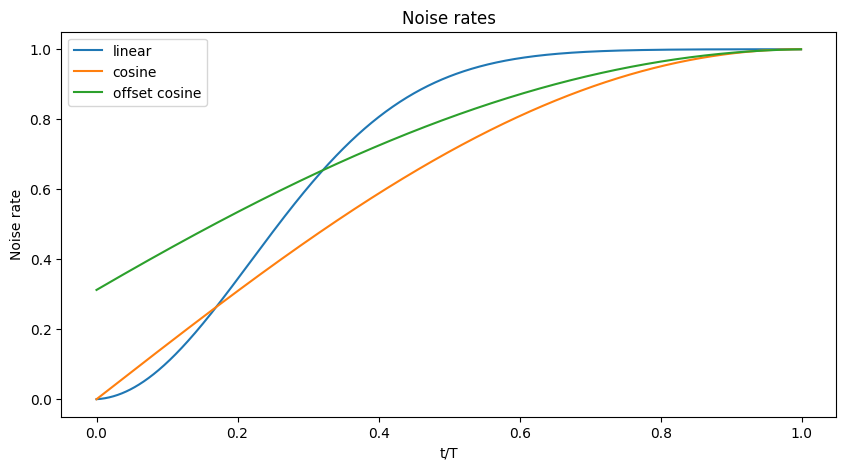

In [12]:
T=1000
diffusion_times = [x/T for x in range(T)]
diffusion_times = np.array(diffusion_times,dtype=np.float32)

lin_noise_rates, lin_signal_rates = linear_diffusion_schedules(diffusion_times)
cos_noise_rates, cos_signal_rates = cosine_schedules(diffusion_times)
off_cos_noise_rates, off_cos_signal_rates = offset_cosine_diffusion_schedule(diffusion_times)

plt.figure(figsize=(10,5))
plt.plot(diffusion_times, lin_noise_rates, label="linear")
plt.plot(diffusion_times, cos_noise_rates, label="cosine")
plt.plot(diffusion_times, off_cos_noise_rates, label="offset cosine")
plt.legend()
plt.title("Noise rates")
plt.xlabel("t/T")
plt.ylabel("Noise rate")
plt.show()

In [13]:
import tensorflow as tf

diff_times = tf.random.uniform(shape=(10,1,1,1),minval=0.0, maxval=1.0)

In [15]:
diff_times=diff_times.numpy()

In [16]:
diff_times.shape

(10, 1, 1, 1)

In [20]:
diff_times[0,0,0,0]

0.3915987